In [134]:
#import basic libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_table("drugLibTrain_raw.tsv")
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [ ]:
# df.info(verbose = True)

In [135]:
df["urlDrugName"] = df["urlDrugName"].astype("category")
df["condition"] = df["condition"].astype("category")
df["sideEffects"] = df["sideEffects"].astype("category")
df["effectiveness"] = df["effectiveness"].astype("category")

df['benefitsReview'] = df['benefitsReview'].astype(str).str.lower()
df['sideEffectsReview'] = df['sideEffectsReview'].astype(str).str.lower()
df['commentsReview'] = df['commentsReview'].astype(str).str.lower()

df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Unnamed: 0         3107 non-null   int64   
 1   urlDrugName        3107 non-null   category
 2   rating             3107 non-null   int64   
 3   effectiveness      3107 non-null   category
 4   sideEffects        3107 non-null   category
 5   condition          3106 non-null   category
 6   benefitsReview     3107 non-null   object  
 7   sideEffectsReview  3107 non-null   object  
 8   commentsReview     3107 non-null   object  
dtypes: category(4), int64(2), object(3)
memory usage: 203.6+ KB


In [136]:
#list all unique values
for col in df:
    print("\n\n")
    print("---------------------------------")
    print(col + ": ")
    print(df[col].unique())
    print("---------------------------------")
    print("\n\n")




---------------------------------
Unnamed: 0: 
[2202 3117 1146 ... 1664 2621 2748]
---------------------------------






---------------------------------
urlDrugName: 
['enalapril', 'ortho-tri-cyclen', 'ponstel', 'prilosec', 'lyrica', ..., 'desonide', 'nasacort-aq', 'glucophage-xr', 'risperdal-consta', 'trileptal']
Length: 502
Categories (502, object): ['abilify', 'accolate', 'accupril', 'accutane', ..., 'zyprexa', 'zyrtec', 'zyrtec-d', 'zyvox']
---------------------------------






---------------------------------
rating: 
[ 4  1 10  3  2  9  7  8  6  5]
---------------------------------






---------------------------------
effectiveness: 
['Highly Effective', 'Marginally Effective', 'Ineffective', 'Considerably Effective', 'Moderately Effective']
Categories (5, object): ['Considerably Effective', 'Highly Effective', 'Ineffective', 'Marginally Effective', 'Moderately Effective']
---------------------------------






---------------------------------
sideEffects: 
['Mild 

In [93]:
#Finding NAs in all columns (irrelevant)
num_rows_in_data = df.shape[0]
print(f"In a total of {num_rows_in_data}")
for col in df:
    quantity_of_na = df[col].isna().sum()
    # Print only columns with NAs 
    if quantity_of_na:
        percent_of_na = round((quantity_of_na * 100) / num_rows_in_data, 2)
        print(f"{col} has {quantity_of_na} NAs which is {percent_of_na}% of its rows.")


In a total of 3107
condition has 1 NAs which is 0.03% of its rows.


In [94]:
df.rating.mean()
df.rating.median()
df.rating.mode()
df.rating.describe()
for col in df:
    print(col)
    print(df[col].describe())
    


Unnamed: 0
count    3107.000000
mean     2080.607016
std      1187.998828
min         0.000000
25%      1062.500000
50%      2092.000000
75%      3092.500000
max      4161.000000
Name: Unnamed: 0, dtype: float64
urlDrugName
count        3107
unique        502
top       lexapro
freq           63
Name: urlDrugName, dtype: object
rating
count    3107.000000
mean        7.006115
std         2.937582
min         1.000000
25%         5.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: rating, dtype: float64
effectiveness
count                 3107
unique                   5
top       Highly Effective
freq                  1330
Name: effectiveness, dtype: object
sideEffects
count                  3107
unique                    5
top       Mild Side Effects
freq                   1019
Name: sideEffects, dtype: object
condition
count           3106
unique          1426
top       depression
freq             236
Name: condition, dtype: object
benefitsReview
count     310

In [ ]:
df.sideEffects.unique()

In [ ]:
df.condition.describe()

<AxesSubplot: title={'center': 'Plot 1: Rating Distribution'}, ylabel='Frequency'>

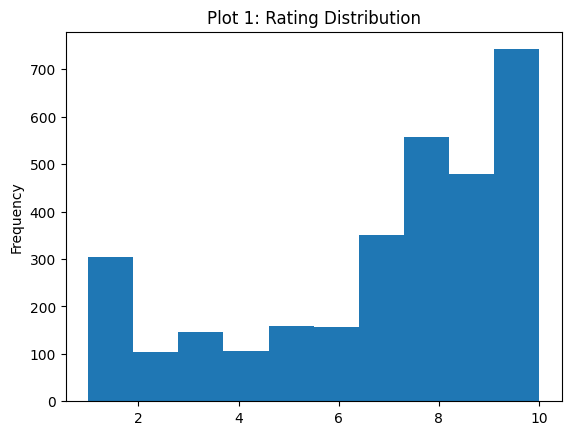

In [137]:
plt.subplot(1, 1, 1)
df.rating.plot(kind='hist', bins=10, xlabel='Rating', title="Plot 1: Rating Distribution")


In [138]:
# sentiment analysis
import sys
# !{sys.executable} -m pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

# benefitsSent = sentiment.polarity_scores(df.benefitsReview)

# text_1 = "The book was a perfect balance between wrtiting style and plot."
# text_2 =  "The pizza tastes terrible."
# sent_1 = sentiment.polarity_scores(text_1)
# sent_2 = sentiment.polarity_scores(text_2)
# print("Sentiment of text 1:", sent_1)
# print("Sentiment of text 2:", sent_2)
# print(benefitsSent)




In [143]:
def define_sent(sent_score):
#     print(f"defining sent for {sent_score}" )
    if sent_score['compound'] >= 0.05 :
        return "1 - Positive"
    elif sent_score['compound'] <= - 0.05 :
        return "2 - Negative"
    else :
        return "0 - Neutral"

benefitsSentCat = []
sideEffectsSentCat = []
commentsSentCat = []
#run sentiment analysis for 3 free test fiels and create new columns
for index, row in df.iterrows():
    benefitsSent = sentiment.polarity_scores(row.benefitsReview)        
#     row['benefitsSentNeg'] = benefitsSent['neg']
#     row['benefitsSentNeu'] = benefitsSent['neu']
#     row['benefitsSentPos'] = benefitsSent['pos']
    benefitsSentCat.append(define_sent(benefitsSent))
#     row['benefitsSentCat'] = define_sent(benefitsSent)        

    sideEffectsSent = sentiment.polarity_scores(row.sideEffectsReview)        
#     row['sideEffectsSentNeg'] = sideEffectsSent['neg']
#     row['sideEffectsSentNeu'] = sideEffectsSent['neu']
#     row['sideEffectsSentPos'] = sideEffectsSent['pos']
    sideEffectsSentCat.append(define_sent(sideEffectsSent))
#     row['sideEffectsSentCat'] = define_sent(sideEffectsSent)        

    commentsSent = sentiment.polarity_scores(row.commentsReview)        
#     row['commentsSentNeg'] = commentsSent['neg']
#     row['commentsSentNeu'] = commentsSent['neu']
#     row['commentsSentPos'] = commentsSent['pos']
    commentsSentCat.append(define_sent(commentsSent))
#     row['commentsSentCat'] = define_sent(commentsSent) 
df['benefitsSentCat'] = benefitsSentCat
df['sideEffectsSentCat'] = sideEffectsSentCat
df['commentsSentCat'] = commentsSentCat

df.head()


,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,benefitsSentCat,sideEffectsSentCat,commentsSentCat
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",1 - Positive,2 - Negative,2 - Negative
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,"heavy cycle, cramps, hot flashes, fatigue, lon...","i hate this birth control, i would not suggest...",1 - Positive,2 - Negative,2 - Negative
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,heavier bleeding and clotting than normal.,i took 2 pills at the onset of my menstrual cr...,1 - Positive,0 - Neutral,2 - Negative
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,"constipation, dry mouth and some mild dizzines...",i was given prilosec prescription at a dose of...,2 - Negative,2 - Negative,0 - Neutral
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,i felt extremely drugged and dopey. could not...,see above,2 - Negative,0 - Neutral,0 - Neutral


Text(0.5, 0.98, 'Plot 2: Sentiments across free text fields')

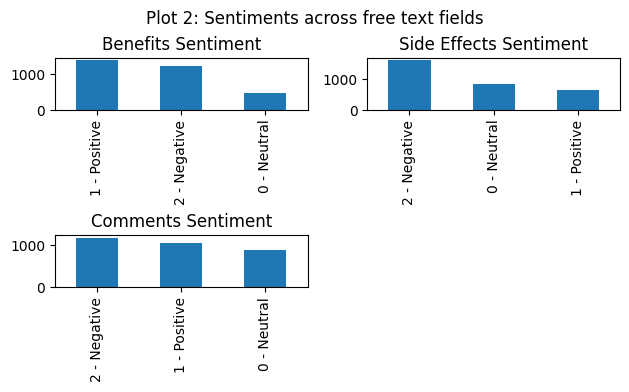

In [144]:
fig=plt.figure()
fig.add_subplot(3, 2, 1)
df['benefitsSentCat'].value_counts().plot(
    kind='bar',
    title = "Benefits Sentiment")
fig.add_subplot(3, 2, 2)

df['sideEffectsSentCat'].value_counts().plot(
    kind='bar',
    title = 'Side Effects Sentiment')
fig.add_subplot(3, 2, 3)
df['commentsSentCat'].value_counts().plot(
    kind='bar',
    title = 'Comments Sentiment')

# fig.subplots_adjust(left=0.0,
#                     bottom=0.0,
#                     right=2.0,
#                     top=2,
#                     wspace=0.4,
#                     hspace=0.4)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Plot 2: Sentiments across free text fields')

In [166]:
# from sklearn.linear_model import LinearRegression
# !{sys.executable} -m pip install statsmodels
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np


x = df[['effectiveness', 'sideEffects', 'benefitsSentCat', 'sideEffectsSentCat','commentsSentCat']]
y = df['rating']
# NB. unlike sm.OLS, there is "intercept" term is included here
fit = smf.ols(formula="rating ~ C(effectiveness) + C(sideEffects) + C(benefitsSentCat) + C(sideEffectsSentCat) + C(commentsSentCat)", data=df).fit()
print("Fit Results")
print("----")
print("Table 1: Regression Model Performance")
fit.summary().tables[0]

Fit Results
----
Table 1: Regression Model Performance


Dep. Variable:,rating,R-squared:,0.760
Model:,OLS,Adj. R-squared:,0.758
Method:,Least Squares,F-statistic:,697.5
Date:,"Sat, 24 Dec 2022",Prob (F-statistic):,0.00
Time:,11:36:09,Log-Likelihood:,-5542.3
No. Observations:,3107,AIC:,1.111e+04
Df Residuals:,3092,BIC:,1.121e+04
Df Model:,14,,
Covariance Type:,nonrobust,,


In [172]:
print("Table 2: Regression Model Coefficients")
fit.summary().tables[1]

Table 2: Regression Model Coefficients


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.5795,0.151,23.639,0.000,3.283,3.876
C(effectiveness)[T.Highly Effective],1.1961,0.062,19.212,0.000,1.074,1.318
C(effectiveness)[T.Ineffective],-3.8439,0.112,-34.417,0.000,-4.063,-3.625
C(effectiveness)[T.Marginally Effective],-2.9748,0.118,-25.269,0.000,-3.206,-2.744
C(effectiveness)[T.Moderately Effective],-1.3898,0.086,-16.147,0.000,-1.559,-1.221
C(sideEffects)[T.Mild Side Effects],4.2029,0.129,32.610,0.000,3.950,4.456
C(sideEffects)[T.Moderate Side Effects],2.9099,0.130,22.314,0.000,2.654,3.166
C(sideEffects)[T.No Side Effects],4.5542,0.131,34.771,0.000,4.297,4.811
C(sideEffects)[T.Severe Side Effects],1.1562,0.135,8.569,0.000,0.892,1.421
C(benefitsSentCat)[T.1 - Positive],0.2917,0.079,3.699,0.000,0.137,0.446


In [175]:
df.benefitsReview.unique()

array(['slowed the progression of left ventricular dysfunction into overt heart failure \r\r\nalone or with other agents in the managment of hypertension \r\r\nmangagement of congestive heart failur',
       "although this type of birth control has more cons than pros, it did help with my cramps. it's also effective with the prevention of pregnancy. (along with use of condoms as well)",
       "i was used to having cramps so badly that they would leave me balled up in bed for at least 2 days.  the ponstel doesn't take the pain away completely, but takes the edge off so much that normal activities were possible. definitely a miracle medication!!",
       ..., '---', 'controlled complex partial seizures.',
       'the drug micardis did seem to alleviate my high blood pressure to some degree though definitely not entirely.  my blood pressure is still higher than i or my doctor would like it to be. at the moment it averages about 140 over 90 but it was 180 over 110. therefore i would say i